# <strong><font color='red'>Exploraci√≥n y an√°lisis de datos (EDA)</font></strong>

El An√°lisis Exploratorio de Datos (EDA, por sus siglas en ingl√©s: Exploratory Data Analysis) es una fase cr√≠tica en el ciclo de vida de cualquier proyecto de an√°lisis de datos, estad√≠stica o ciencia de datos. Consiste en **examinar, resumir y visualizar** los datos con el fin de:
1. Comprender su estructura interna
2. Identificar patrones relevantes
3. Detectar anomal√≠as
4. Descubrir relaciones entre variable
5. Verificar supuestos estad√≠sticos antes de aplicar modelos predictivos o inferenciales. 

El EDA es de naturaleza exploratoria e inductiva, es decir, permite que los datos <strong><font color='blue'>"hablen por s√≠ mismos"</font></strong> sin imponer restricciones iniciales. Esta fase ofrece una primera aproximaci√≥n al comportamiento de los datos y act√∫a como una br√∫jula que orienta las decisiones posteriores en la limpieza, transformaci√≥n y modelado de datos.

Un <strong><font color='red'>buen EDA</font></strong> no solo mejora la calidad del an√°lisis, sino que tambi√©n puede <strong><font color='blue'>revelar insights</font></strong> valiosos que no ser√≠an evidentes a trav√©s de simples estad√≠sticas resumidas, ayudando a prevenir errores, guiar estrategias anal√≠ticas y comunicar hallazgos de manera efectiva a diferentes p√∫blicos, tanto t√©cnicos como no especializados. Esta exploraci√≥n deber√≠a responder a:
- ¬øQu√© tipo de variables hay (categ√≥ricas, num√©ricas, fechas)?
- ¬øHay valores faltantes o at√≠picos (outliers)?
- ¬øCu√°l es la distribuci√≥n de cada variable?
- ¬øExisten relaciones entre variables?
- ¬øLos datos tienen errores o inconsistencias?




üîß **T√©cnicas comunes de EDA**

| Tipo de An√°lisis           | Ejemplos de T√©cnicas                                   |
| -------------------------- | ------------------------------------------------------ |
| **Univariado**             | Histogramas, boxplots, estad√≠sticas descriptivas.      |
| **Bivariado/Multivariado** | Correlaci√≥n, diagramas de dispersi√≥n, tablas cruzadas. |
| **Detecci√≥n de problemas** | Detecci√≥n de valores nulos, duplicados, outliers.      |
| **Transformaciones**       | Conversi√≥n de tipos de datos, escalado, normalizaci√≥n. |


üìå **¬øPor qu√© es importante realizar un EDA?**
1. Detectar errores antes de modelar.
2. Generar hip√≥tesis sobre los datos.
3. Guiar decisiones sobre qu√© variables usar o transformar.
4. Comunicar hallazgos con claridad a p√∫blicos t√©cnicos y no t√©cnicos.

## Librer√≠as

In [309]:
#librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import plotly.express as px
import plotly.graph_objects as go


## <strong><font color='blue'>1. Carga y descripci√≥n inicial del dataset</font></strong>

üìÅ Dataset de ejemplo: Titanic
<br> Este conjunto de datos contiene informaci√≥n sobre los pasajeros que viajaban a bordo del RMS Titanic, el famoso barco que se hundi√≥ en 1912. El objetivo m√°s com√∫n al analizar este dataset es predecir la probabilidad de supervivencia de los pasajeros en funci√≥n de caracter√≠sticas como su edad, sexo, clase social, tarifa pagada, entre otros.

**Variables principales:**
- Survived: indica si el pasajero sobrevivi√≥ (1) o no (0).
- Pclass: clase del pasajero (1¬™, 2¬™, 3¬™).
- Sex: sexo del pasajero.
- Age: edad del pasajero.
- SibSp: n√∫mero de hermanos/c√≥nyuges a bordo.
- Parch: n√∫mero de padres/hijos a bordo.
- Fare: tarifa pagada por el boleto.
- Embarked: puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).

In [310]:
# Dataset de ejemplo: Titanic (puede cambiarse por otro)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Vista general
print("Primeras filas del dataset:")
display(df.head())

# Tama√±o, tipos de variables y valores nulos
print("\nInformaci√≥n general:")
df.info()

print("\nResumen estad√≠stico:")
display(df.describe(include='all'))

print("\nValores nulos por columna:")
display(df.isnull().sum())

Primeras filas del dataset:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S


Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Resumen estad√≠stico:


PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN


Valores nulos por columna:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## <strong><font color='blue'> 2. Limpieza y transformaci√≥n de datos</font></strong>

**Variables del Dataset Titanic**

| üß© Variable      | üìê Tipo        | üìù Descripci√≥n                                                                 |
|------------------|---------------|---------------------------------------------------------------------------------|
| üÜî PassengerId   | Entero        | Identificador √∫nico para cada pasajero                                         |
| üõü Survived      | Binaria       | Indicador de supervivencia (0 = No, 1 = S√≠)                                    |
| ü™ë Pclass        | Entero        | Clase socioecon√≥mica (1 = Primera, 2 = Segunda, 3 = Tercera)                   |
| üßë‚Äçüíº Name          | Texto         | Nombre completo del pasajero                                                   |
| ‚öß Sex           | Categ√≥rica    | Sexo del pasajero (`male` o `female`)                                          |
| üéÇ Age           | Num√©rica      | Edad del pasajero en a√±os                                                      |
| üë´ SibSp         | Entero        | N√∫mero de hermanos o c√≥nyuge a bordo                                           |
| üë®‚Äçüë©‚Äçüëß Parch         | Entero        | N√∫mero de padres o hijos a bordo                                               |
| üé´ Ticket        | Texto         | C√≥digo del boleto                                                              |
| üí≤ Fare          | Num√©rica      | Precio del boleto                                                              |
| üö™ Cabin         | Texto         | N√∫mero de cabina asignada                                                      |
| ‚öì Embarked      | Categ√≥rica    | Puerto de embarque (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton)     |



### **Eliminaci√≥n de variables**
Variables eliminadas por irrelevancia:
- `Name`: Puede usarse para extraer t√≠tulos (Sr., Mrs., etc.) pero no aporta directamente al EDA.
- `Ticket`: C√≥digo del boleto, poco √∫til sin procesamiento extra.
- `Cabin`: Muchos valores faltantes, dif√≠cil de usar directamente.

In [311]:
# Limpieza de columnas irrelevantes 
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

### **Imputaci√≥n de variables**
- Imputaste valores faltantes en `Age` y `Embarked`.

In [312]:
# Imputaci√≥n de valores faltantes 
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

### **Tratamiento de Variables Categ√≥ricas**
Las variables categ√≥ricas son cruciales en cualquier an√°lisis, pero necesitan un tratamiento especial para que los modelos y an√°lisis estad√≠sticos las entiendan correctamente. Principalmente el manejo se estas variables se realiza a trav√©s de:
- Visualizaci√≥n: Se utilizan gr√°ficos como countplot, barplot, o pie chart para observar la distribuci√≥n de categor√≠as.
- Cruces con variables num√©ricas: Usar boxplot o violinplot para ver c√≥mo var√≠a una variable num√©rica seg√∫n cada categor√≠a.
- Agrupamientos (groupby): Para obtener estad√≠sticas descriptivas por categor√≠a.

Las variables categ√≥ricas deben transformarse en un formato num√©rico. Aqu√≠ algunas t√©cnicas:

| üõ†Ô∏è T√©cnica            | üìã Descripci√≥n                                                                 | ‚úÖ Recomendaci√≥n de uso                            |
|------------------------|----------------------------------------------------------------------------------|----------------------------------------------------|
| üéØ Label Encoding       | Asigna un n√∫mero entero a cada categor√≠a                                        | Solo si las categor√≠as tienen orden (ordinal)     |
| üß© One-Hot Encoding     | Crea columnas binarias para cada categor√≠a                                       | Ideal para categor√≠as sin orden l√≥gico            |
| ‚öôÔ∏è Binary Encoding      | Convierte categor√≠as en formato binario distribuido en varias columnas          | √ötil si hay muchas categor√≠as √∫nicas              |
| üìä Frequency Encoding   | Sustituye categor√≠as por su frecuencia en el dataset                            | Eficiente y simple, funciona bien en modelos lineales |
| üéØ Target Encoding      | Sustituye por la media de la variable objetivo seg√∫n categor√≠a                   | Muy potente, pero se debe usar con cuidado por riesgo de sobreajuste |

Acci√≥n:
- Se convirtieron `Sex` y `Embarked` a variables categ√≥ricas.

In [313]:
# Conversi√≥n de variables categ√≥ricas 
#df['Sex'] = df['Sex'].astype('category')
#df['Embarked'] = df['Embarked'].astype('category')
#
df['Sex'] = df['Sex'].astype(str)
df['Embarked'] = df['Embarked'].astype('str')

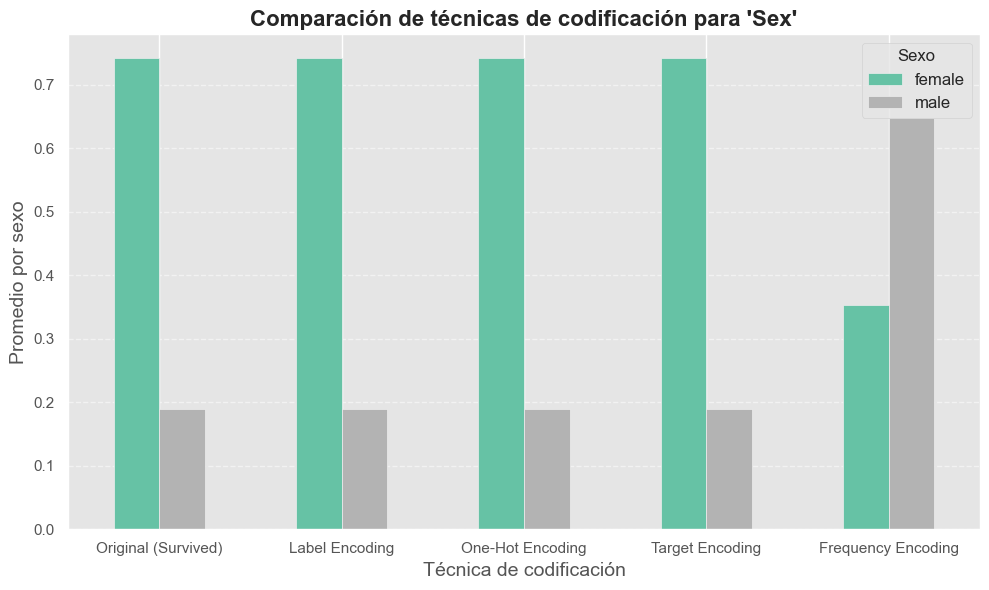

In [314]:
# Configuraci√≥n visual
sns.set(style="whitegrid")
plt.style.use('ggplot')

# ===============================
# Codificaciones sobre 'Sex'
# Label Encoding
le = LabelEncoder()
df['Sex_LE'] = le.fit_transform(df['Sex'])  # 0 = female, 1 = male
sex_map = dict(zip(range(len(le.classes_)), le.classes_))
label_encoded = df.groupby('Sex_LE')['Survived'].mean()
label_encoded.index = label_encoded.index.map(sex_map)

# One-Hot Encoding (sin drop_first para conservar ambas categor√≠as)
df_ohe = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=False)
df = pd.concat([df, df_ohe], axis=1)
onehot_encoded = {
    'female': df[df['Sex_female'] == 1]['Survived'].mean(),
    'male': df[df['Sex_male'] == 1]['Survived'].mean()
}

# Target Encoding
df['Sex_TE'] = df.groupby('Sex')['Survived'].transform('mean')
target_encoded = df.groupby('Sex')['Sex_TE'].mean()

# Frequency Encoding
df['Sex_FE'] = df['Sex'].map(df['Sex'].value_counts(normalize=True))
freq_encoded = df.groupby('Sex')['Sex_FE'].mean()

# Valor real (sin codificaci√≥n)
original_survival = df.groupby('Sex')['Survived'].mean()

# ===============================
# Crear resumen comparativo
sex_summary = pd.DataFrame({
    'Original (Survived)': original_survival,
    'Label Encoding': label_encoded,
    'One-Hot Encoding': pd.Series(onehot_encoded),
    'Target Encoding': target_encoded,
    'Frequency Encoding': freq_encoded
})

# ===============================
# Visualizaci√≥n
sex_summary.T.plot(kind='bar', figsize=(10,6), rot=0, colormap='Set2')
plt.title("Comparaci√≥n de t√©cnicas de codificaci√≥n para 'Sex'", fontsize=16, fontweight='bold')
plt.ylabel("Promedio por sexo", fontsize=14)
plt.xlabel("T√©cnica de codificaci√≥n", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Sexo", fontsize=12)
plt.tight_layout()
plt.show()

**T√©cnicas de Codificaci√≥n Aplicadas sobre la Variable `Sex` en el Dataset Titanic**

| üõ†Ô∏è T√©cnica              | üí° ¬øQu√© hace?                                                                                          | üìà Resultado Obtenido |
|-------------------------|--------------------------------------------------------------------------------------------------------|------------------------|
| `Original`   | Calcula directamente la supervivencia promedio por sexo sin aplicar ninguna transformaci√≥n.            | - Mujeres ‚âà 74% sobrevivieron<br>- Hombres ‚âà 19% sobrevivieron |
| `Label Encoding`        | Asigna un n√∫mero entero arbitrario a cada categor√≠a: `female = 0`, `male = 1`.                         | √ötil para modelos de √°rbol; no conserva relaci√≥n sem√°ntica con `Sex`. |
| `One-Hot Encoding`      | Crea una columna binaria para cada categor√≠a (`Sex_female`, `Sex_male`).                              | Representa bien la presencia/ausencia. Conserva diferencias reales en supervivencia. |
| `Target Encoding`       | Sustituye cada categor√≠a por la media de supervivencia para esa categor√≠a.                            | Refleja directamente el patr√≥n real de supervivencia. Peligro de sobreajuste si no se controla. |
| `Frequency Encoding`    | Reemplaza cada categor√≠a por su frecuencia de aparici√≥n en el dataset (`proporci√≥n`).                 | √ötil para modelos simples. No refleja directamente la relaci√≥n con `Sex`. |

**Conclusiones:**

- **Target y One-Hot Encoding** fueron las que **mejor conservaron la estructura real** de los datos.
- **Label y Frequency Encoding** son m√°s estructurales que informativas.
- Siempre es √∫til comparar las codificaciones contra el valor original para validar su utilidad antes de entrenar modelos.



## <strong><font color='blue'> 3. An√°lisis univariado (distribuciones de variables)</font></strong>

### Sex

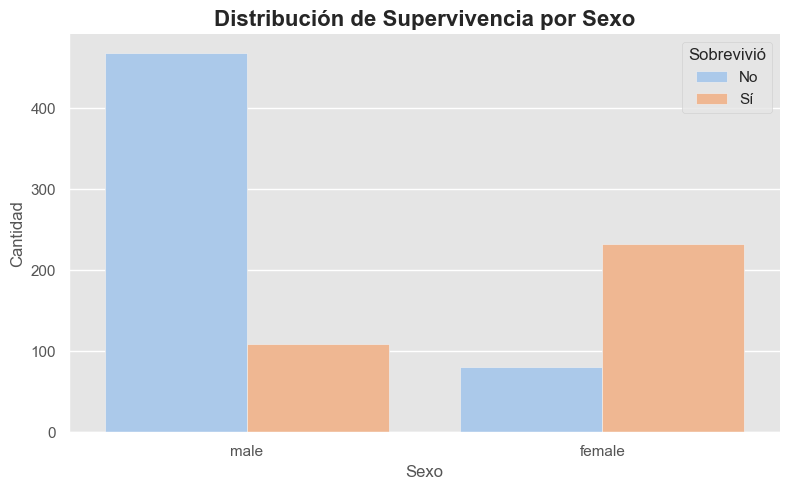

In [315]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title("Distribuci√≥n de Supervivencia por Sexo", fontsize=16, fontweight='bold')
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.legend(title="Sobrevivi√≥", labels=["No", "S√≠"])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Age

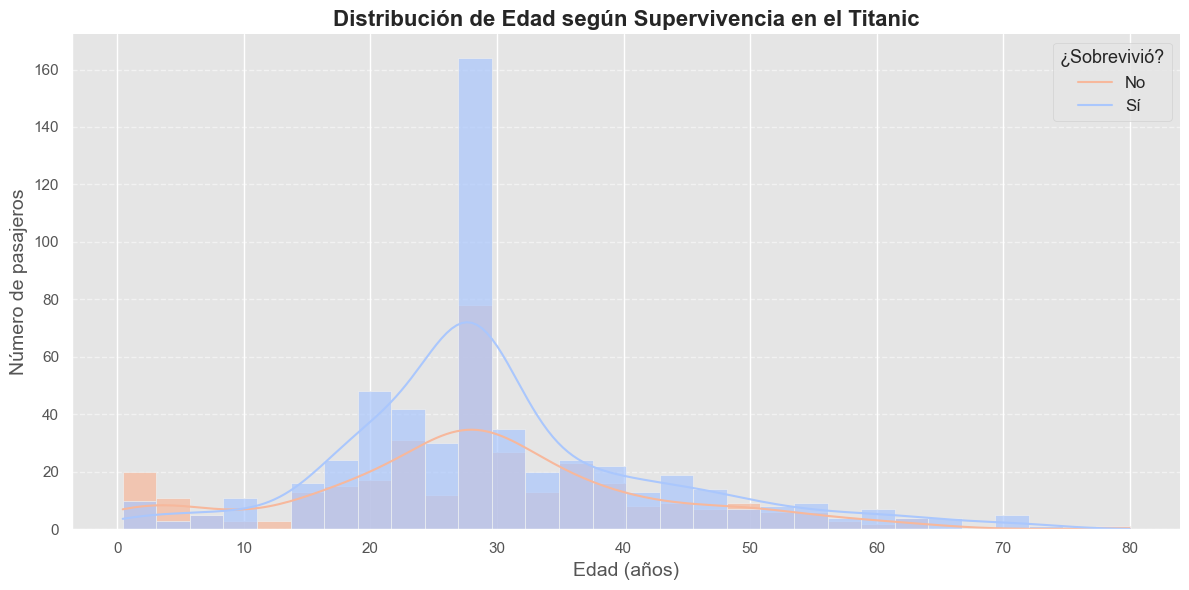

In [316]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Age', hue='Survived', bins=30, kde=True, palette='coolwarm', alpha=0.7)
plt.title("Distribuci√≥n de Edad seg√∫n Supervivencia en el Titanic", fontsize=16, fontweight='bold')
plt.xlabel("Edad (a√±os)", fontsize=14)
plt.ylabel("N√∫mero de pasajeros", fontsize=14)
plt.legend(title="¬øSobrevivi√≥?", labels=["No", "S√≠"], fontsize=12, title_fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Psclass

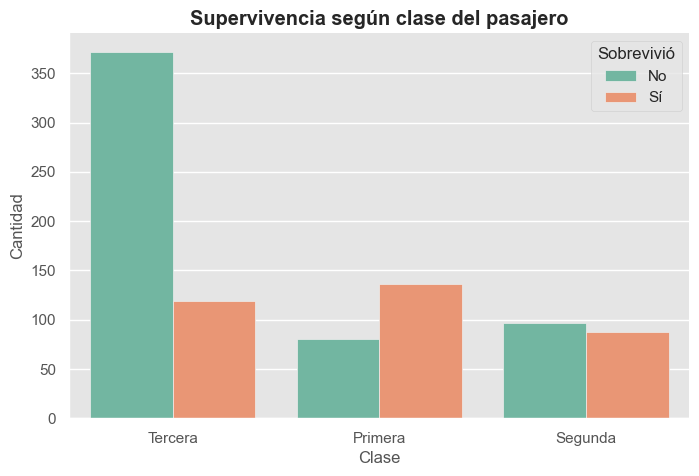

In [317]:
# Mapear Pclass a nombres de clase
df['Clase'] = df['Pclass'].map({1: 'Primera', 2: 'Segunda', 3: 'Tercera'})

# Gr√°fico actualizado
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Clase', hue='Survived', palette='Set2')
plt.title("Supervivencia seg√∫n clase del pasajero", fontweight='bold')
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend(title="Sobrevivi√≥", labels=["No", "S√≠"])

#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Embarked

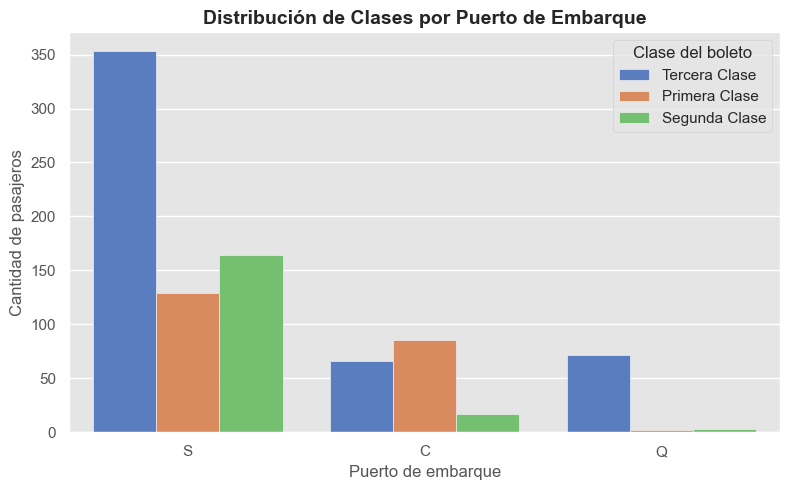

In [318]:
# clases
clase_map = {1: 'Primera Clase', 2: 'Segunda Clase', 3: 'Tercera Clase'}

# Convertir valores de Pclass a nombres descriptivos para la leyenda
df['Clase_nombre'] = df['Pclass'].map(clase_map)

# Gr√°fico
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Embarked', hue='Clase_nombre', palette='muted')
plt.title("Distribuci√≥n de Clases por Puerto de Embarque", fontsize=14, fontweight='bold')
plt.xlabel("Puerto de embarque")
plt.ylabel("Cantidad de pasajeros")
plt.legend(title="Clase del boleto", loc='upper right')
plt.tight_layout()
plt.show()


## <strong><font color='blue'> 4. An√°lisis multivariado (correlaci√≥n)</font></strong>
El an√°lisis de correlaciones busca descubrir relaciones lineales entre variables num√©ricas del dataset. Esto permite:
- Identificar variables redundantes que aportan informaci√≥n similar.
- Detectar patrones relevantes que puedan ayudar en la construcci√≥n de modelos predictivos.
- Evaluar posibles confusiones estad√≠sticas o relaciones espurias.
- Priorizar variables con mayor relaci√≥n con la variable objetivo (Survived).

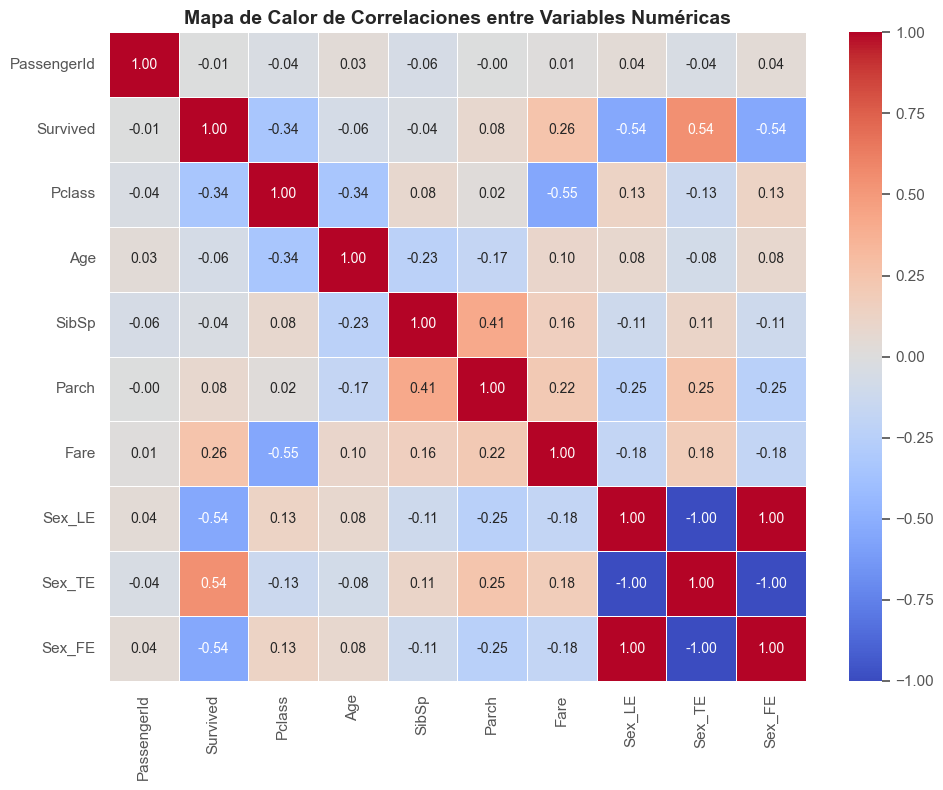

In [319]:
# Selecci√≥n de columnas num√©ricas
numeric_df = df.select_dtypes(include=[np.number])

# Verificaci√≥n y visualizaci√≥n de la matriz de correlaci√≥n
if not numeric_df.empty and not numeric_df.corr().isnull().all().all():
    plt.figure(figsize=(10,8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f",
                vmin=-1, vmax=1, linewidths=0.5, linecolor='white',
                mask=numeric_df.corr().isnull())
    plt.title("Mapa de Calor de Correlaciones entre Variables Num√©ricas", fontsize=14, fontweight='bold')

    # Limpiar bordes superiores/derechos
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas num√©ricas v√°lidas para calcular correlaciones.")


### Principales Conclusiones
Este estudio utiliz√≥ un mapa de calor para visualizar las correlaciones entre variables num√©ricas del dataset Titanic, ayudando a identificar relaciones relevantes para an√°lisis y modelado predictivo.

#### 1. `Fare` vs `Pclass` ‚Üí üîª Correlaci√≥n negativa significativa
- Los pasajeros de **Primera Clase** pagaron boletos m√°s costosos.
- Refleja una clara relaci√≥n entre clase socioecon√≥mica y precio.

#### 2. `Survived` vs `Fare` y `Pclass` ‚Üí üéØ Correlaciones relevantes
- **`Survived` y `Fare`:** correlaci√≥n positiva ‚Äî pasajeros que pagaron m√°s tendieron a sobrevivir.
- **`Survived` y `Pclass`:** correlaci√≥n negativa ‚Äî los de clase m√°s baja sobrevivieron menos.
- Estas variables pueden ser **predictoras clave** en modelos de clasificaci√≥n.

#### 3. `SibSp` vs `Parch` ‚Üí üë™ Correlaci√≥n positiva
- Las personas que viajaban con hermanos/esposos tambi√©n ten√≠an padres/hijos a bordo.
- Indica presencia de n√∫cleos familiares, relevante en estudios de comportamiento.

#### 4. `Age` ‚Üí üîò Correlaciones d√©biles
- No muestra una relaci√≥n lineal fuerte con otras variables num√©ricas.
- Su efecto podr√≠a ser **no lineal** o condicional (por ejemplo, edad extrema protegida).

---

#### Conclusi√≥n

Este an√°lisis identifica patrones socioecon√≥micos y familiares que influyen en la probabilidad de supervivencia. 

## <strong><font color='blue'> 5. Detecci√≥n de outliers</font></strong>

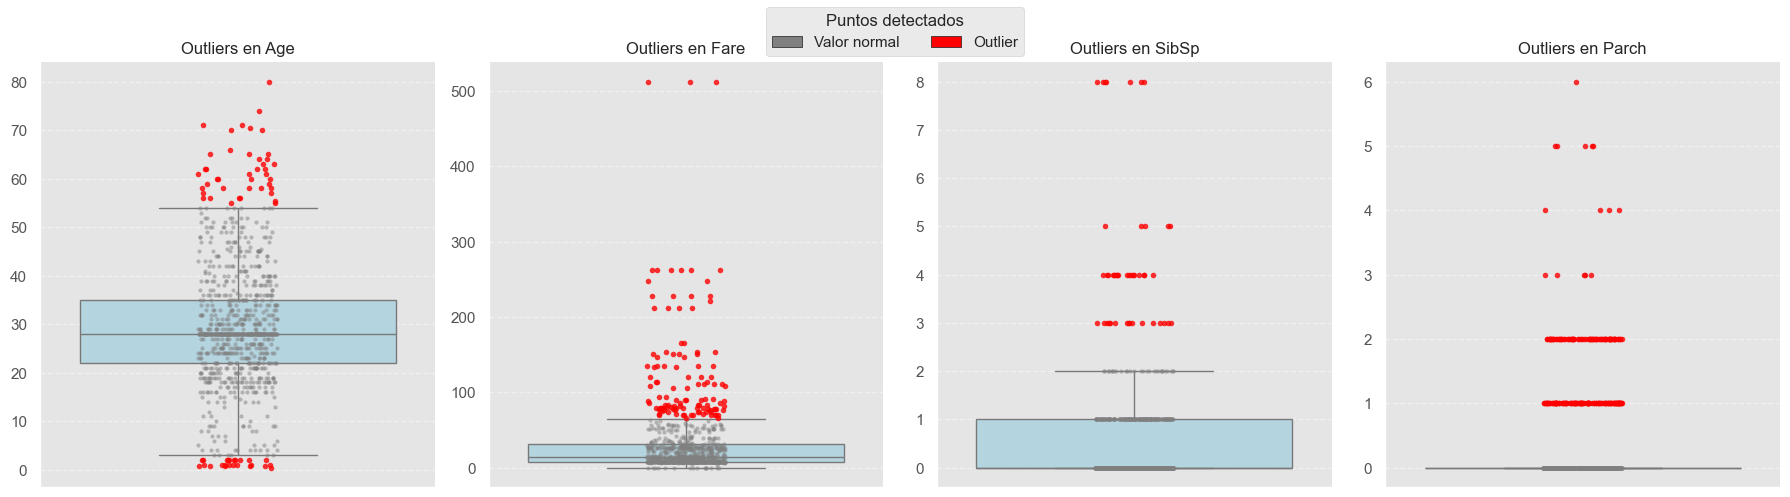

In [320]:
# Variables a analizar
variables = ['Age', 'Fare', 'SibSp', 'Parch']

# Colores personalizados
color_normales = 'gray'
color_outliers = 'red'

# Visualizaci√≥n con leyenda manual
fig, axes = plt.subplots(1, len(variables), figsize=(18,5))

for i, var in enumerate(variables):
    ax = axes[i]

    # IQR para detectar outliers
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Separar datos
    normales = df[(df[var] >= lower) & (df[var] <= upper)][var]
    outliers = df[(df[var] < lower) | (df[var] > upper)][var]

    # Boxplot sin puntos
    sns.boxplot(y=df[var], ax=ax, color='lightblue', fliersize=0)

    # Puntos normales y outliers en distinto color
    sns.stripplot(y=normales, ax=ax, color=color_normales, size=3, jitter=True, alpha=0.5)
    sns.stripplot(y=outliers, ax=ax, color=color_outliers, size=4, jitter=True, alpha=0.8)

    ax.set_title(f"Outliers en {var}", fontsize=12)
    ax.set_ylabel("")
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# leyenda manual
legend_elements = [
    Patch(facecolor=color_normales, edgecolor='k', label='Valor normal'),
    Patch(facecolor=color_outliers, edgecolor='k', label='Outlier')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize=11, title='Puntos detectados')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # espacio para la leyenda superior
plt.show()


### Principales observaciones visuales

Este an√°lisis explora la presencia de outliers en las variables num√©ricas clave del dataset Titanic, utilizando la regla de 1.5√óIQR y visualizando los valores extremos con color rojo para mayor claridad:

| Variable | Valores normales | Outliers detectados | Rango aceptable (IQR) |
|----------|------------------|----------------------|------------------------|
| `Fare`   | Mayor√≠a dentro de rango medio | Pasajes extremadamente caros sobresalen | \$7.91 ‚Äì \$65.64 |
| `Age`    | Principalmente adultos j√≥venes | Extremadamente j√≥venes o muy mayores | 20.13 ‚Äì 48.12 a√±os |
| `SibSp`  | Viajaban solos o con 1 acompa√±ante | Casos con ‚â• 4 hermanos/esposos | 0 ‚Äì 1 |
| `Parch`  | Viajaban sin padres/hijos | Casos con ‚â• 4 familiares directos | 0 ‚Äì 1 |

**Conclusiones**
- Las variables `Fare` y `Age` exhibieron las **mayores dispersiones**.
- Correlacionar los outliers con `Survived` para detectar patrones de comportamiento excepcionales.

## <strong><font color='blue'> 6. Visualizaci√≥n interactiva con Plotly </font></strong>

In [321]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="Fare", color="Survived", size='Pclass',
                 hover_data=['Sex', 'Embarked'])
fig.show()


In [322]:
# Variables a evaluar
variables = ['Age', 'Fare', 'SibSp', 'Parch']
data_plotly = []

# Detectar outliers por variable
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Crear columna de flag
    df[f'{var}_outlier'] = df[var].apply(lambda x: 'Outlier' if (x < lower or x > upper) else 'Normal')

    # Crear DataFrame para Plotly
    temp = df[[var, f'{var}_outlier']].copy()
    temp['Variable'] = var
    temp.rename(columns={var: 'Valor', f'{var}_outlier': 'Tipo'}, inplace=True)
    data_plotly.append(temp)

# Unir todo
plot_df = pd.concat(data_plotly, ignore_index=True)

# ‚ú® Visualizaci√≥n interactiva
fig = px.box(plot_df, x="Variable", y="Valor", color="Tipo", 
             points="all", title="Outliers Interactivos por Variable Num√©rica",
             color_discrete_map={'Normal': 'lightgray', 'Outlier': 'red'},
             hover_data={'Valor': True, 'Tipo': True})

fig.update_layout(
    font=dict(size=12),
    boxmode='group',
    legend_title='Tipo de dato',
    yaxis_title="Valor",
    xaxis_title="Variable",
    height=600
)

fig.show()


###  Hallazgos clave

Mediante el uso de Plotly, se construy√≥ una visualizaci√≥n interactiva que compara las distribuciones de variables num√©ricas (`Age`, `Fare`, `SibSp`, `Parch`) del dataset Titanic, destacando los valores at√≠picos (outliers) con color rojo frente a los valores normales en gris.

#### 1. `Fare`: la variable con mayor cantidad de outliers
- Se observan tarifas extremadamente altas asociadas a boletos de lujo.
- Los outliers est√°n muy alejados del resto del conjunto, lo que sugiere una distribuci√≥n muy sesgada.

#### 2. `Age`: dispersi√≥n moderada con outliers en los extremos
- Los valores at√≠picos corresponden a personas muy mayores y muy j√≥venes (ni√±os peque√±os).
- Esto podr√≠a estar vinculado a patrones de supervivencia diferenciados.

#### 3. `SibSp` y `Parch`: concentraciones normales con pocos outliers
- La mayor√≠a de los pasajeros viajaban solos o con un acompa√±ante.
- Los outliers reflejan familias numerosas y casos especiales, con valores poco frecuentes (‚â• 4).

#### 4. Interactividad mejora la exploraci√≥n
- Permite examinar cada punto individual con su tipo (`Outlier` o `Normal`) en el tooltip.
- Posibilidad de hacer zoom, filtrar por variable y detectar comportamiento extremo f√°cilmente.

### Implicaciones y pr√≥ximos pasos

- Los outliers pueden influir en modelos predictivos, afectando m√©tricas como precisi√≥n o AUC.
- Ser√≠a √∫til cruzar la variable `Tipo` con `Survived` para evaluar si los valores extremos afectan la probabilidad de supervivencia.